# Приоритизация гипотез. Запуск и оценка результатов А/B-теста

Необходимо приоритизировать гипотезы по увеличению выручки в крупном интернет-магазине по заранее подготовленному списку. Затем требуется провести A/B-тест и проанализировать его результаты.

**Описание данных:**

Файл /hypothesis_us.csv

* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /orders_us.csv. Скачать датасет

* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /visitors_us.csv. Скачать датасет

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# 1. Приоритизация гипотез 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
hypothesis = pd.read_csv('/content/hypotheses_us.csv', sep=';')
display(hypothesis)
display(hypothesis.info())

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

В файле список из 9-ти гопотез, пропусков и проблем с типами данных нет. Скорректируем названия полей и можно приступать к приоритизации.

In [3]:
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis.sample())

,hypothesis,reach,impact,confidence,effort
4,Change the background color on the main page. ...,3,1,1,1


## 1.2. Посчитаем ICE

In [4]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence']) / hypothesis['effort']
display(hypothesis[['hypothesis','ICE']].sort_values('ICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


Самае перспективные гипотезы по ICE: 8, 0, 7 и 6

## 1.2. Посчитаем RICE

In [5]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']) / hypothesis['effort']
display(hypothesis[['hypothesis','RICE']].sort_values('RICE', ascending=False))

,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


По RICE наиболее перспективные гипотезы: 7, 2, 0 и 6

In [6]:
display(hypothesis)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


При определении приоритета гипотезы стоит учитывать не только влияние на пользователей, затраты и степень уверенности в самой гипотезе, но и охват - число пользователей, которых она затронет. Гипотеза 7 существенно вырвалась вперёд, т.к. помимо высоких impact и confidence, коснётся всех пользователей сайта.

Также можно заметить, что топ-5 гипотез для обоих подходов одинаков по составу.

# 2. Анализ A/B-теста 


## 2.1. Обзор и предобработка данных 

In [7]:
orders = pd.read_csv('/content/orders_us.csv')
visitors = pd.read_csv('/content/visits_us.csv')

In [8]:
# Рассмотрим таблицу с заказами:
display(orders.head(5))
display(orders.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

In [9]:
# Рассмотрим таблицу с пользователями:
display(visitors)
display(visitors.info())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Мы имеем данные о количестве посетителей из групп А и В за август 2019.

Необходимо:

* привести тип поля date к datetime

In [10]:
orders.columns = orders.columns.str.lower()
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
#display(orders.info())
#display(visitors.info())


## 2.2. Анализ 

**2.2.1. График кумулятивной выручки по группам**

In [11]:
# Создадим массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date', 'group']].drop_duplicates()

# Соберём агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transactionid':pd.Series.nunique, 'visitorid':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated.head(6))

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
310,2019-08-03,B,61,59,6050.6


In [12]:
# Соберём агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated.head(6))

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [13]:
# Объединим кумулятивные данные в одной таблице:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(6))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
5,2019-08-03,B,61,59,6050.6,1803


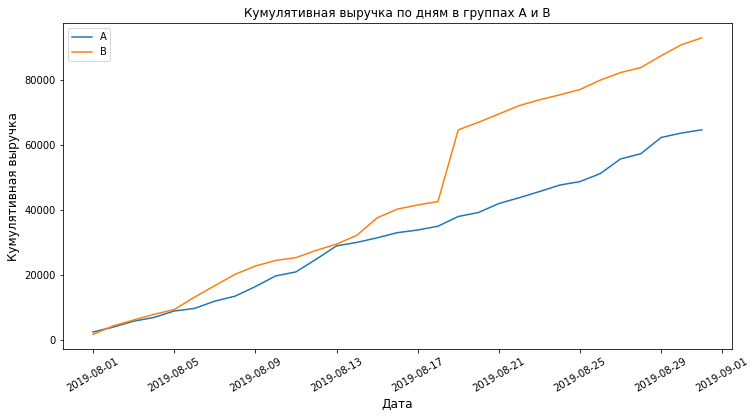

In [14]:
# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

# Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:
cumulativeRevenueB =cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивная выручка', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

* Выручка в группе А почти равномерно увеличивается на протяжении всего теста.
* Выручка в группе В также увеличивается, но с заметным скачком почти в середине теста. Возможно, имело место большое количество заказов в группе В или же всплеск их стоимости.
* Почти на всём протяжении теста кумулятивная выручка в группе В больше, чем в А.

**2.2.2. График кумулятивного среднего чека по группам**

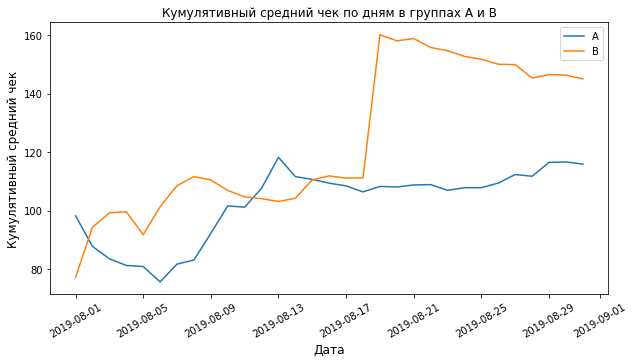

In [15]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

* Средний чек в группе А выравнивается к середине теста.
* Средний чек в группе В одномоментно существенно вырос и теперь ему требуется больше времени, чтобы прийти к своему реальному среднему значению. Вероятно, имела место одна или несколько очень дорогих покупок.

**2.2.3. График относительного изменения кумулятивного среднего чека группы B к группе A**

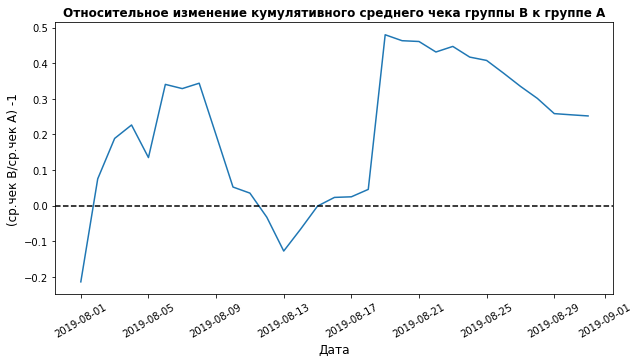

In [16]:
# Собираем данные в одном датафрейме:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(ср.чек В/ср.чек А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

* График резко скачет в нескольких точках - определённо, имеют место какие-то выбросы.

**2.2.4. График кумулятивной конверсии по группам**

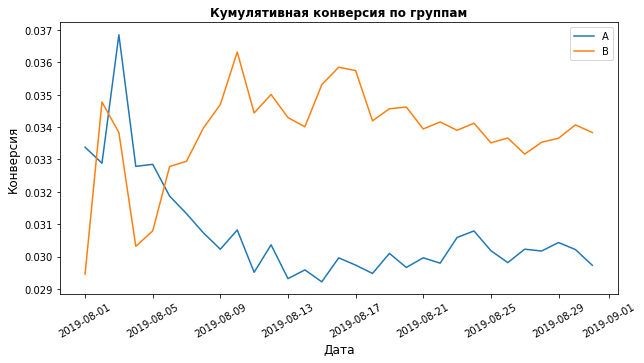

In [17]:
# Считаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Данные по группе A:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Данные по группе B:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
#plt.axis(['2019-08-01', '2019-08-31', 0.015, 0.05]) 
plt.title('Кумулятивная конверсия по группам', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Конверсия', fontsize=12)
plt.xticks(rotation=30)
plt.show()

* Сначала конверсии колебались, но довольно быстро выровнялись и результат группы В оказался стабильно лучше, чем в группе А.

**2.2.5. График относительного изменения кумулятивной конверсии группы B к группе A** 

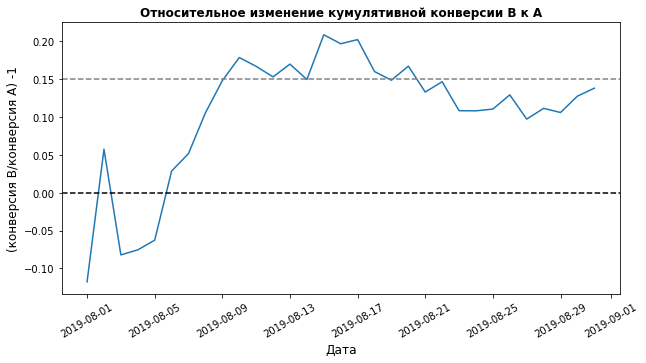

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
#plt.axis(['2019-08-01', '2019-08-31', -0.2, 0.3]) 
plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(конверсия В/конверсия А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

* Вскоре после начала теста конверсия группы В опередила конверсию А и до конца теста оставалась выше.
* На графике есть скачки, которые могут говорить о наличии выбросов в данных.

**2.2.6. График количества заказов по пользователям**

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

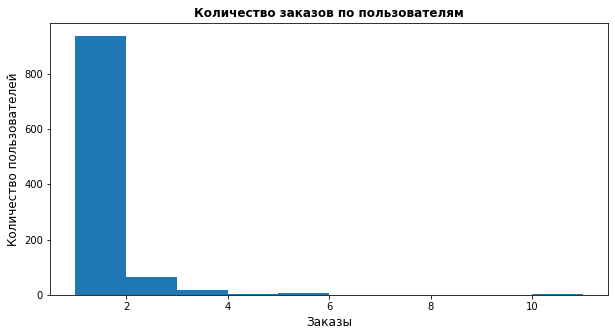

In [19]:
# Датафрейм с количеством заказов по пользователям:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['visitorid','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 
display(ordersByUsers['orders'].describe())

plt.figure(figsize=(10,5))
plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

* Большинство пользователей оформляли заказ единожды.

Построим точечную диаграмму числа заказов на одного пользователя.

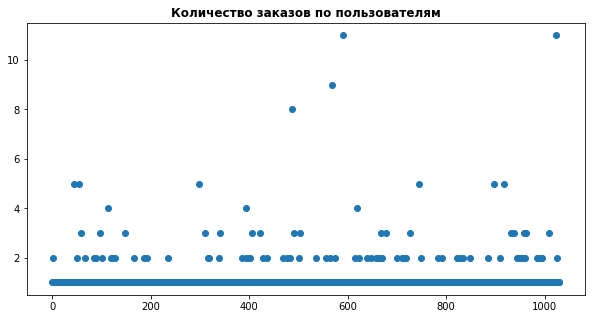

In [20]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

* Много пользователей с 2-3 заказами. Нужно определить их точную долю, чтобы понять можно ли считать их выбросами или нет.

**2.2.7. Определение границы количества заказов на пользователя** 

In [21]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]



* Не более 5% пользователей оформляли более 2-х заказов, и не более 1% - свыше 4-х заказов.

Примем 3 заказа за верхнюю границу числа заказов на одного пользователя.

**2.2.8. График стоимостей заказов**

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

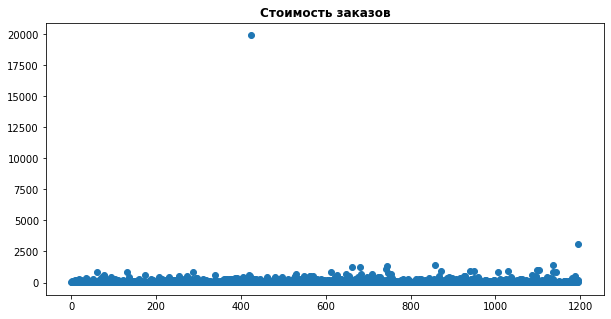

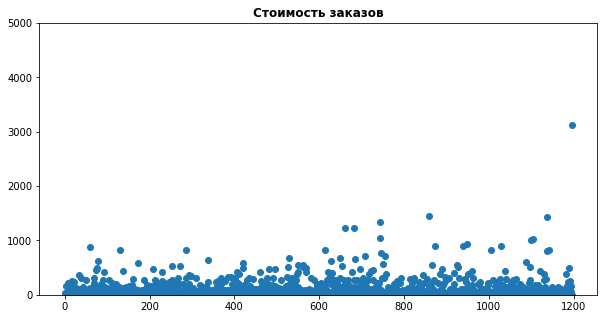

In [22]:
display(orders['revenue'].describe())

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

plt.figure(figsize=(10,5))
plt.ylim(0, 5000)
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.show()

* В данных оказался один очень крупный заказ (~200.000 руб.), который существенно влияет на результаты теста.
* Так же заметны и другие выбросы - необходимо определить верхнюю границу стоимости заказа.

In [23]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[282.48  435.54  900.904]


* Не более 5% заказов дороже 435 руб. и не более 1% дороже 1000 руб.

Примем 500 руб. за верхнюю границу стоимости заказа.


**2.2.10. Статистическая значимость различий в конверсии между группами по «сырым» данным**

In [29]:
# Подготовим датафрейм с фактическими и кумулятивными данными по дням:

visitorsADaily = visitors[visitors['group']=='A'][['date', 'visits']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateA':'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visits']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date':'max', 'visitorsPerDateB':'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily
                      .apply(lambda x:ordersADaily[ordersADaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateA':'sum',
                                    'revenuePerDateA':'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'transactionid':pd.Series.nunique, 'revenue':'sum'})
               )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = (ordersBDaily
                      .apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                             .agg({
                                    'date':'max',
                                    'ordersPerDateB':'sum',
                                    'revenuePerDateB' : 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (ordersADaily
        .merge(ordersBDaily, left_on='date', right_on='date', how='left')
        .merge(ordersACummulative, left_on='date', right_on='date', how='left')
        .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsADaily, left_on='date', right_on='date', how='left')
        .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
        .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
        .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,2356.8,21,1620.0,24,2356.8,21,1620.0,719,713,719,713
1,2019-08-02,20,1503.5,24,2623.8,44,3860.3,45,4243.8,619,581,1338,1294
2,2019-08-03,24,1815.2,16,1806.8,68,5675.5,61,6050.6,507,509,1845,1803
3,2019-08-04,16,1146.6,17,1717.3,84,6822.1,78,7767.9,717,770,2562,2573
4,2019-08-05,25,1988.1,23,1495.0,109,8810.2,101,9262.9,756,707,3318,3280


In [30]:
# Создадим для каждой группы датафрейм с количеством заказов на пользователя:

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':pd.Series.nunique})
ordersByUsersB.columns = ['visitorid', 'orders']

In [31]:
# Создадим списки с числом заказов каждого пользователя, включая нули:

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [32]:
# Функция для проверки гипотезы о равенстве групп dataA и dataB
def stat_significance(dataA, dataB):
    # Нулевая гипотеза H0: между группами dataA и dataB нет статистически значимой разницы
    alpha = 0.05
    p_value = stats.mannwhitneyu(dataA, dataB)[1]

    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный выигрыш/проигрыш В к А: {0:.1%}".format(dataB.mean()/dataA.mean()-1))

In [33]:
stat_significance(sampleA, sampleB)

P-value: 0.008
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 13.8%


* По не очищенным от выбросов данным между конверсиями групп А и В есть статистически значимая разница
* При этом относительный выигрыш группы В равен 13.8%

**2.2.11. Статистическая значимость различий в среднем чеке по «сырым» данным**

In [34]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.346
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный выигрыш/проигрыш В к А: 25.2%


* Нет оснований считать, что средний чек группы В отличается от среднего чека группы А
* При этом выигрыш среднего чека группы В относительно А равен 25.2%

Мы наблюдаем силу непараметрического теста (U-критерий Манна-Уитни), который позволяет исключить влияние выбросов на результат.

**2.2.12. Статистическая значимость различий в конверсии между группами по очищенным данным**

In [36]:
# Выделим из базы "аномальных" пользователей (совершивших более 3-х заказов или сумма заказа которых > 30000):

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorid'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorid']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 1000]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print()
print('\033[1m', 'Количество "аномальных" пользователей:', abnormalUsers.shape[0])

1099     148427295
18       199603092
23       237748145
744      888512513
1103    1164614297
Name: visitorid, dtype: int64

 Количество "аномальных" пользователей: 18


In [37]:

# Создадим списки с числом заказов каждого пользователя, включая нули, но уже по очищенным данным:

sampleAFiltered = pd.concat([ordersByUsersA[~(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[~(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [38]:
stat_significance(sampleAFiltered, sampleBFiltered)


P-value: 0.007
Отвергаем нулевую гипотезу: между группами есть разница
Относительный выигрыш/проигрыш В к А: 15.1%


* По очищенным данным между конверсиями групп А и В по-прежнему есть статистически значимая разница
* При этом относительный выигрыш группы В увеличился на 1% по сравнению с "сырыми" данными и стал равен 15.1%

**2.2.13. Статистическая значимость различий в среднем чеке по очищенным данным**

In [39]:
(stat_significance(
    orders[(orders['group']=='A') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'], 
    orders[(orders['group']=='B') & ~(orders['visitorid'].isin(abnormalUsers))]['revenue'])
)

P-value: 0.460
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный выигрыш/проигрыш В к А: -1.6%


* По-прежнему, нет оснований считать, что средний чек группы В отличается от среднего чека группы А
* По очищенным данным проигрыш среднего чека группы В относительно А равен 1.6%

# Выводы 

* И по "сырым" и по очищенным от выбросов данным между конверсиями групп А и В есть статистически значимая разница. Конверсия группы В выше, чем в А, на 13-14%
* И по "сырым" и по очищенным данным нет оснований считать, что средний чек группы В отличается от среднего чека группы А.
* График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным - фиксируем победу группы В. Средний чек выше не стал, зато значительно увеличилась конверсия.